In [ ]:
from script.NeuralNets.Networks import ICNN, SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.NeuralNets.trainFunction import train_icnn
from script.eval import Plots_for
from script.Verification.Verification import verification
import torch
import torchvision as tv
from script.DHOV.Normalisation import normalize_nn, get_std, get_mean, normalize_data
import matplotlib

In [11]:
epochs = 3
batch_size = 1
number_of_train_samples = 10000
hyper_lambda = 0.1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

non_normalized_icnn = ICNN([2, 10, 10, 1])
normalized_icnn = ICNN([2, 10, 10, 1])

#matplotlib.use("TkAgg")

In [12]:
norm_included_space, norm_ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range)  #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()
std = torch.tensor([0.001,0.001], dtype=torch.float64)
mean = torch.tensor([1,2], dtype=torch.float64)

def un_norm(samples):
    new_tensor = torch.empty(samples.size(), dtype=torch.float64)
    for i in range(len(new_tensor)):
        new_tensor[i] = samples[i] * std + mean
    return new_tensor

print(norm_included_space[0])
un_norm_included_space = tv.transforms.Lambda(lambda samples: un_norm(samples))(norm_included_space).detach().requires_grad_(True)
un_norm_ambient_space = tv.transforms.Lambda(lambda samples: un_norm(samples))(norm_ambient_space).detach().requires_grad_(True)
print(un_norm_included_space[0])


"""true_extremal_points = [[0,0]]
un_norm_ambient_space = torch.load("../../ambient_space_after_relu.pt", weights_only=True)
un_norm_included_space = torch.load("../../included_space_after_relu.pt", weights_only=True)

mean = get_mean(un_norm_included_space, un_norm_ambient_space)
std = get_std(un_norm_included_space, un_norm_ambient_space)

norm_included_space, norm_ambient_space = normalize_data(un_norm_included_space, un_norm_ambient_space, mean, std)
"""

tensor([-0.0963,  0.1964], dtype=torch.float64)
tensor([0.9999, 2.0002], dtype=torch.float64, grad_fn=<SelectBackward0>)


'true_extremal_points = [[0,0]]\nun_norm_ambient_space = torch.load("../../ambient_space_after_relu.pt", weights_only=True)\nun_norm_included_space = torch.load("../../included_space_after_relu.pt", weights_only=True)\n\nmean = get_mean(un_norm_included_space, un_norm_ambient_space)\nstd = get_std(un_norm_included_space, un_norm_ambient_space)\n\nnorm_included_space, norm_ambient_space = normalize_data(un_norm_included_space, un_norm_ambient_space, mean, std)\n'

In [13]:
norm_dataset = ConvexDataset(data=norm_included_space)
norm_train_loader = DataLoader(norm_dataset, batch_size=batch_size, shuffle=True)
norm_dataset = ConvexDataset(data=norm_ambient_space)
norm_ambient_loader = DataLoader(norm_dataset, batch_size=batch_size, shuffle=True)

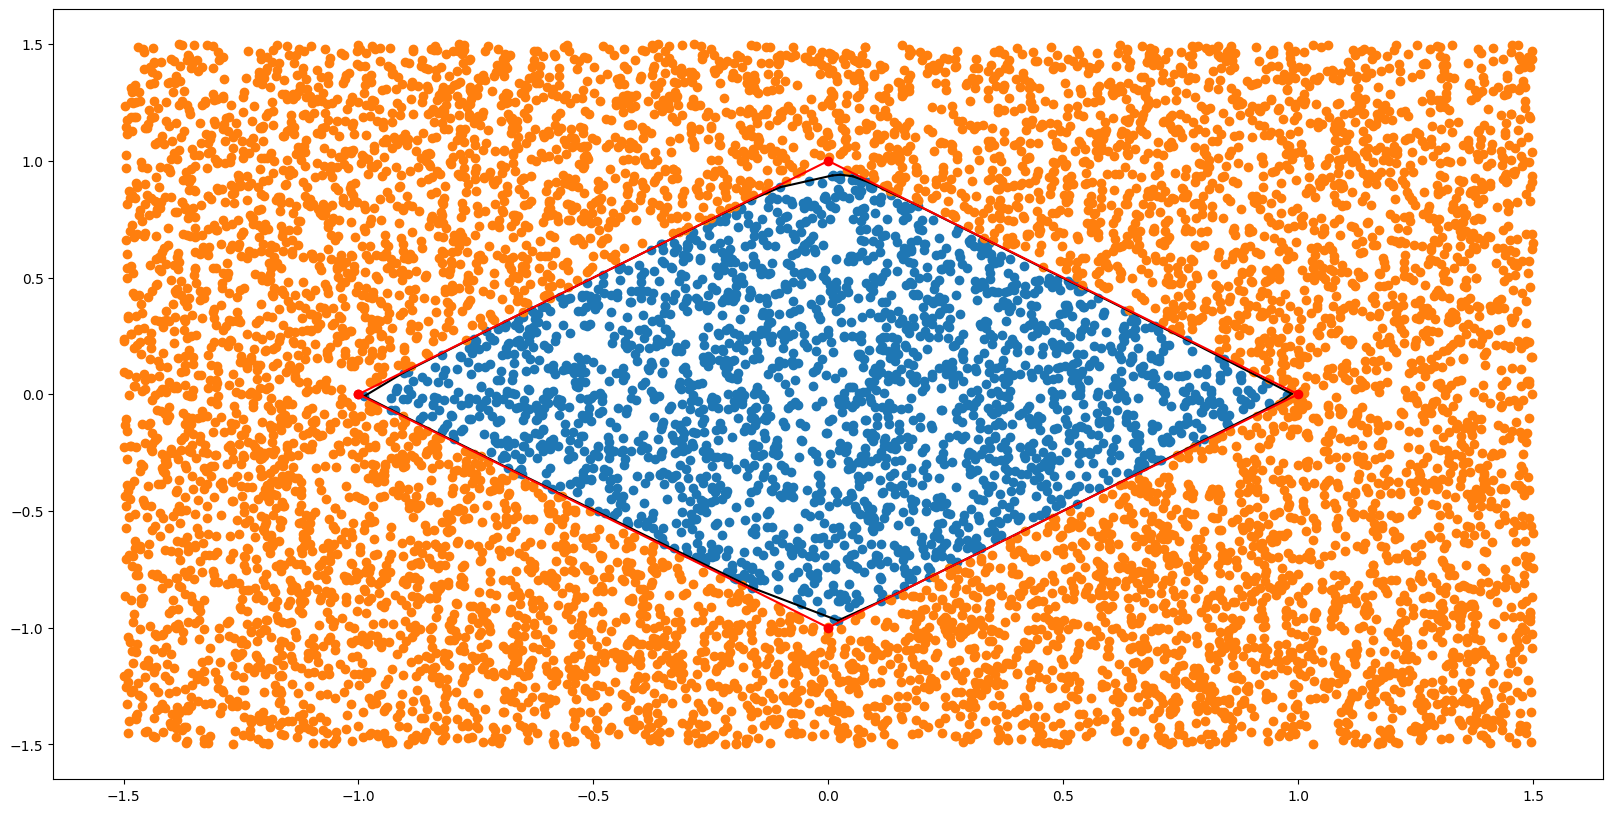

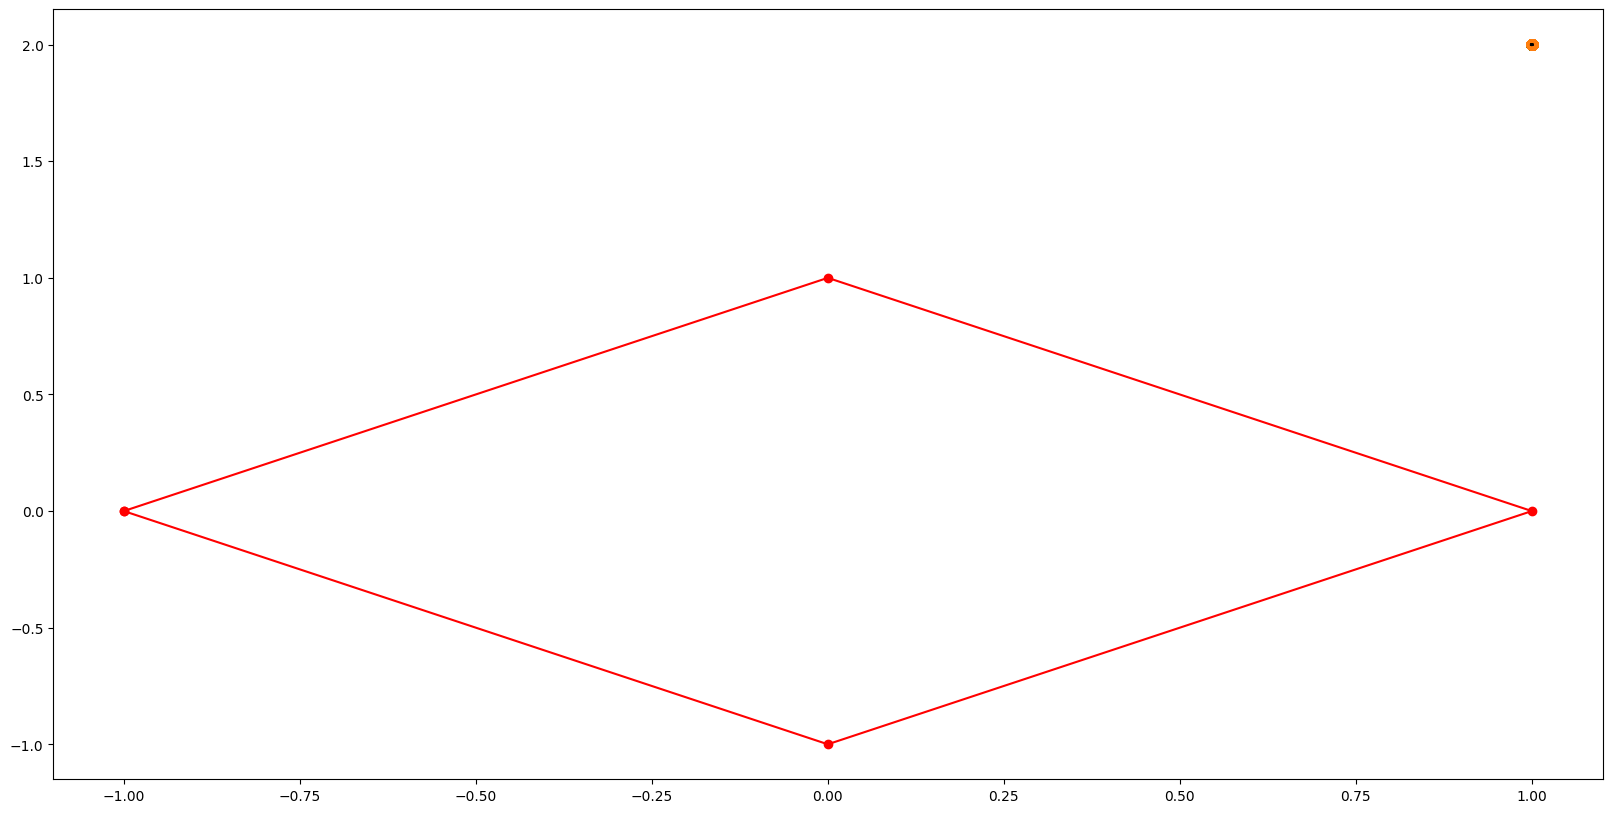

In [14]:
norm_plots = Plots_for(0, non_normalized_icnn, norm_included_space.detach(), norm_ambient_space.detach(), true_extremal_points, x_range, y_range)
norm_plots.plt_initial()

un_norm_plots = Plots_for(0, normalized_icnn, un_norm_included_space.detach(), un_norm_ambient_space.detach(), true_extremal_points, [0.998, 1.002], [1.998, 2.002]) #
un_norm_plots.plt_initial()

In [15]:
history = train_icnn(non_normalized_icnn, norm_train_loader,norm_ambient_loader, epochs=epochs, hyper_lambda=hyper_lambda)

=== Epoch: 0===
batch = 0, mean loss = 0.779107540787562
batch = 100, mean loss = 0.6796846544057689
batch = 200, mean loss = 0.6476567130689742
batch = 300, mean loss = 0.616150631543381
batch = 400, mean loss = 0.5995644267189982
batch = 500, mean loss = 0.5836983575296877
batch = 600, mean loss = 0.5698955204827557
batch = 700, mean loss = 0.5572802122246383
batch = 800, mean loss = 0.5458291405328975
batch = 900, mean loss = 0.5356248690928207
batch = 1000, mean loss = 0.5232280815849895
batch = 1100, mean loss = 0.5136240165086919
batch = 1200, mean loss = 0.5031688439917708
batch = 1300, mean loss = 0.4946492038049239
batch = 1400, mean loss = 0.4854331763885097
batch = 1500, mean loss = 0.4758728415814743
batch = 1600, mean loss = 0.46727421609858544
batch = 1700, mean loss = 0.4591312446874851
batch = 1800, mean loss = 0.45067449290744127
batch = 1900, mean loss = 0.4428947634843059
batch = 2000, mean loss = 0.43449883553856183
batch = 2100, mean loss = 0.4266636934738963
batch

In [16]:
normalized_icnn.load_state_dict(non_normalized_icnn.state_dict())
normalize_nn(normalized_icnn, mean, std, isICNN=True)


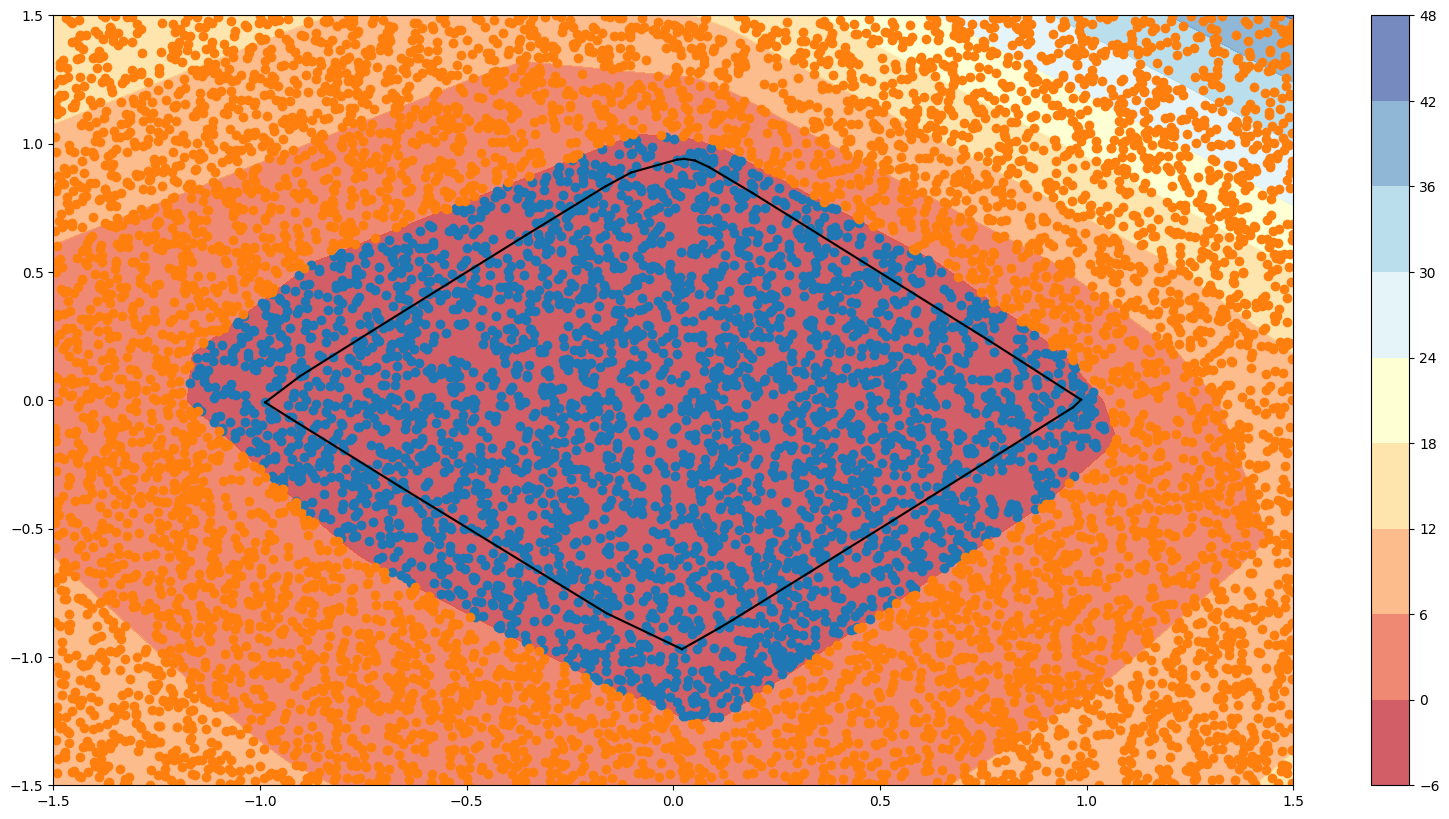

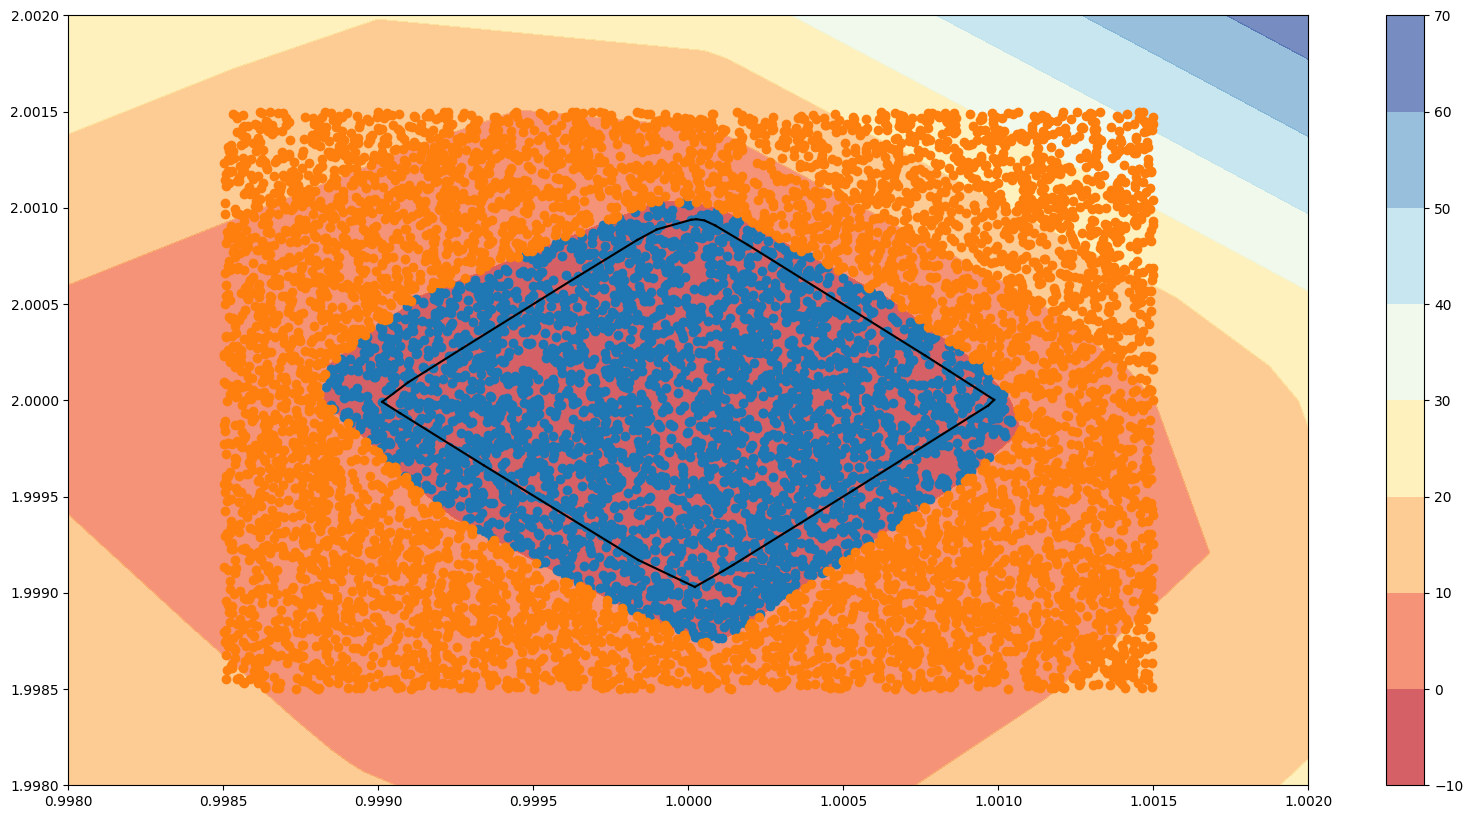

In [17]:
norm_plots.plt_mesh()
un_norm_plots.plt_mesh()

In [18]:
import numpy as np
center = [1.18125, 2.367]
eps = 0.002
print("max: {}, {}".format(center[0]-eps, center[0]+eps))
print("min: {}, {}".format(center[1]-eps, center[1]+eps))
A, b = Rhombus().get_A(), Rhombus().get_b()
result = verification(normalized_icnn, A_b=[A,b])

max: 1.17925, 1.18325
min: 2.365, 2.3689999999999998


In [19]:
input_data, un_norm_plots.c = result
un_norm_plots.plt_mesh()

TypeError: cannot unpack non-iterable NoneType object